In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
class LinearRegression():
  def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.slope = None
        self.intercept = None
        self.costs = []

  def fit(self, X, y):
        self.slope = 0
        self.intercept = 0
        n = len(X)

        for i in range(self.iterations):
            y_pred = self.predict(X)

            slope_grad = (-2/n) * np.sum(X * (y - y_pred))
            intercept_grad = (-2/n) * np.sum(y - y_pred)

            self.update_weights(slope_grad, intercept_grad)

            cost = np.mean((y - y_pred) ** 2)
            self.costs.append(cost)

            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.6f}")

        return self

  def update_weights(self, slope_grad, intercept_grad):
        self.slope = self.slope - self.learning_rate * slope_grad
        self.intercept = self.intercept - self.learning_rate * intercept_grad

  def predict(self, X):
        if self.slope is None or self.intercept is None:
            raise ValueError("Модель не обучена. Сначала вызовите метод fit().")
        return self.slope * X + self.intercept

Iteration 0: Cost = 1798.671485
Iteration 100: Cost = 25.016909
Iteration 200: Cost = 11.142730
Iteration 300: Cost = 6.164931
Iteration 400: Cost = 4.378988
Iteration 500: Cost = 3.738224
Iteration 600: Cost = 3.508330
Iteration 700: Cost = 3.425848
Iteration 800: Cost = 3.396255
Iteration 900: Cost = 3.385638


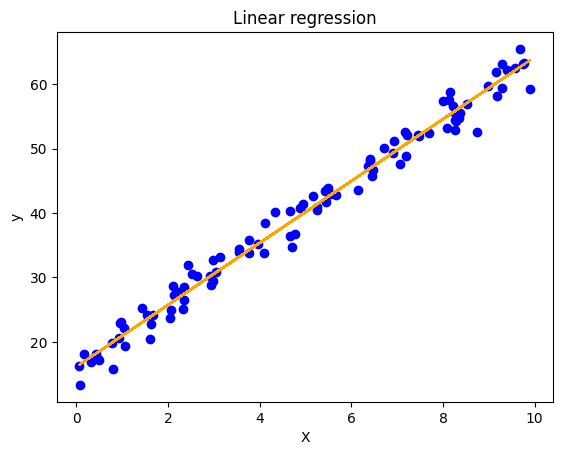

In [6]:
np.random.seed(99)
X = np.random.rand(100) * 10
y = 5 * X + 15 + np.random.randn(100) * 2

model = LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'orange')
plt.title('Linear regression')
plt.xlabel('X')
plt.ylabel('y')

plt.show()